In [1]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2

In [1]:
pip install xelatex 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [12]:
# Test de normalidad: ejemplo Jaruqe-Bera

x_size=10**6
# a mayor grados de libertad, t student converge a una distr normal
degrees_freedom = 2
tipo_variable_aleatoria ='normal'  # normal exponential student

if tipo_variable_aleatoria =='normal':
    x = np.random.standard_normal(size = x_size)
    variable = tipo_variable_aleatoria
elif tipo_variable_aleatoria =='exponential':
    x = np.random.standard_exponential(size = x_size)
    variable = tipo_variable_aleatoria
elif tipo_variable_aleatoria == 'student':
    x = np.random.standard_t(size = x_size, df=degrees_freedom)
    variable = tipo_variable_aleatoria +' (df = '+str(degrees_freedom)+')'
elif tipo_variable_aleatoria == 'chi-squared':
    x = np.random.chisquare(size = x_size, df=degrees_freedom)
    variable = tipo_variable_aleatoria +' (df = '+str(degrees_freedom)+')'

''' a kurtosis indica qué tan pesadas o ligeras son las colas de la distribución
 en comparación con una distribución normal.

 Distribución normal : kurtosis = 3.
 kurtosis > 3 : leptocurtica (colas más pesadas que la distribución normal)
 kurtosis <3  : platicúrtica ( colas más ligeras que la distribución normal)

 Kurtosis en exceso = Kurtosis - 3. 
 Así, kurtosis en exceso  de Dist. Normal = 0, cualquier desviación indica apuntamiento + o -
 Un valor negativo no significa necesariamente dist. con colas mas ligeras, sino una desviacion de distr Normal
'''

# Calculo de metricas
x_mean = np.mean(x)
x_std = np.std(x) # volatilidad
x_skew = skew(x)
x_kurt = kurtosis(x) # Es kurtosis en exceso. Significa que 0 indica distr normal

# Deja 5% al lado derecho,mas el 5% del lado izquierdo suman 10% en extremos= 90% IC
x_95 = np.percentile(x,95)  
# dame un numero tal que el percentil 5% de casos esten a la izquierda o  95% a la derecha = percentil 5
x_var_95 = np.percentile(x,5) 
# cvar: cuando pierdo, qué tanto pierdo?
x_cvar_95 =  np.mean(x[x<= x_var_95]) # promedio de los 5% peores rendimientos que puedo tener(izq de var_95)

# Deja 2.5% lado derecho, mas el otro 2.5% lado izquierdo suman 5% = 95% IC
x_975 = np.percentile(x,97.5)
x_025 = np.percentile(x,2.5)
# habrá una probabilidad de p_value de tener los valores a la izquierda de jb
jb = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
# p_value = significancia = nivel de confianza
# si p_value > 0.05 = normal. P_value es la probabilidad de hallar un valor mayor a jb en su grafica
# si p_value>0.05 se rechaza hipotesis nula(h0)
p_value = 1- chi2.cdf(jb, df = 2) # probabilidad de puntos que caigan a la izquierda
is_normal = (p_value > 0.05)    # equivalente a jb < 6 =  Normal. Aceptamos Hipotesis Nula (H0)

print(variable)
print('Media: ',x_mean)
print('Desv Estandar: ',x_std)
print('Asimetria: ',x_skew)
print('Kurtosis: ',x_kurt)
# var95 para distr normal: -1.64. Significa que el 5% de valores son menores a -1.64
# var95 en dist exponencial: 0.05. Significa que solo el 5% de valores son menores a 0.05
print('Var 95%', x_var_95)
print('CVar 95%', x_cvar_95)

print('Jarque-Bera: ',jb) # Valor debe acercarse a 0 para asemejarse a distr normal
print('p-value: ',p_value)
print('Es normal?:',is_normal)


# comentar ; ctrl + k + c
# descomentar: ctrl + k + u
# despleglar funciones(opciones de lo que se puede hacer): ctrl + space 
# print('Percentil 95 con 90% de confianza: ',x_95)   # de izquierda hasta 95% = 1.64
# print('Percentil 5 con 90% de confianza: ',x_5)     # de izquierda hasta el 5% = -1.64
# print('Percentil 97.5 con 95% de confianza: ',x_975)   # de izquierda hasta 97.5% = 1.96
# print('Percentil 2.5 con 95% de confianza: ',x_025)     # de izquierda hasta el 5% = -1.96

normal
Media:  -0.00042341655534660196
Desv Estandar:  0.9999858739393123
Asimetria:  0.002610362430424604
Kurtosis:  0.003051339641990669
Var 95% -1.6454544665983344
Jarque-Bera:  1.523610070144697
p-value:  0.46682303411286774
Es normal?: True


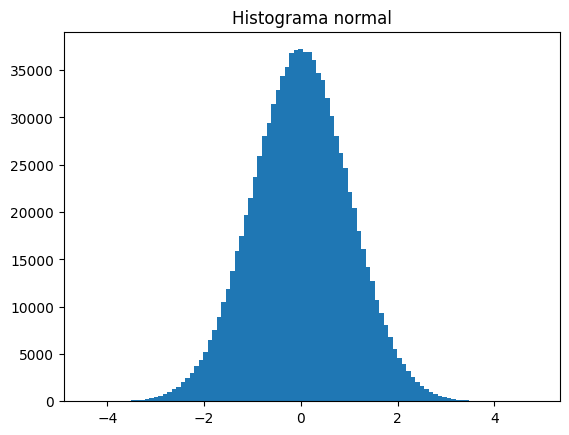

In [28]:
plt.figure()
plt.hist(x, bins=100)
plt.title('Histograma '+ variable)
plt.show()

In [13]:
# COn Borell-Cantelli: Probamos que el test de normalidad puede fallar.
# EJemplo: distribución normal evaluado como si no fuera normal
# corremos while hasta encontrar una distribucion normal que no cumpla el test de normalidad jb
is_normal = True
counter = 0 
while is_normal:
    x_size=10**6
    # a mayor grados de libertad, t student converge a una distr normal
    degrees_freedom = 2
    tipo_variable_aleatoria ='normal'  # normal exponential student

    if tipo_variable_aleatoria =='normal':
        x = np.random.standard_normal(size = x_size)
        variable = tipo_variable_aleatoria
    elif tipo_variable_aleatoria =='exponential':
        x = np.random.standard_exponential(size = x_size)
        variable = tipo_variable_aleatoria
    elif tipo_variable_aleatoria == 'student':
        x = np.random.standard_t(size = x_size, df=degrees_freedom)
        variable = tipo_variable_aleatoria +' (df = '+str(degrees_freedom)+')'
    elif tipo_variable_aleatoria == 'chi-squared':
        x = np.random.chisquare(size = x_size, df=degrees_freedom)
        variable = tipo_variable_aleatoria +' (df = '+str(degrees_freedom)+')'

    # Calculo de metricas
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x) # Es kurtosis en exceso. Significa que 0 indica distr normal
    # dame un numero tal que solo 5% de casos esten a la izquierda o  95% a la derecha = percentil 5
    x_var95 = np.percentile(x,5) 
    jb = x_size/6*(x_skew**2 + 1/4*x_kurt**2)
    p_value = 1- chi2.cdf(jb, df = 2) # probabilidad de puntos que caigan a la izquierda
    is_normal = (p_value > 0.05)    # equivalente a jb < 6

    print(variable)
    print('Media: ',x_mean)
    print('Desv Estandar: ',x_std)
    print('Asimetria: ',x_skew)
    print('Kurtosis: ',x_kurt)
    print('Var 95%', x_var95)
    print('Jarque-Bera: ',jb) # Valor debe acercarse a 0 para asemejarse a distr normal
    print('p-value: ',p_value)
    print('Es normal?:',is_normal)

    print('Contador: ',counter)
    counter += 1
    print('-'*10)

normal
Media:  -0.0020829724408889653
Desv Estandar:  0.9992225886613353
Asimetria:  -0.003237830936320679
Kurtosis:  0.0050786427513238586
Var 95% -1.649824787456433
Jarque-Bera:  2.8219503701814728
p-value:  0.2439053143143931
Es normal?: True
Contador:  0
----------
normal
Media:  0.0012628832226820159
Desv Estandar:  0.9995887972588071
Asimetria:  0.0019868149487309657
Kurtosis:  0.0005288203119095947
Var 95% -1.6398144528699732
Jarque-Bera:  0.669557728512145
p-value:  0.7154962906641146
Es normal?: True
Contador:  1
----------
normal
Media:  0.0002540084246933699
Desv Estandar:  0.9999447388462077
Asimetria:  0.0005879915170171256
Kurtosis:  -0.0020282973304524
Var 95% -1.642849471208521
Jarque-Bera:  0.22903858987736395
p-value:  0.8917947311274649
Es normal?: True
Contador:  2
----------
normal
Media:  -0.00012879448601090665
Desv Estandar:  1.0003931697340709
Asimetria:  -0.0004974835236209878
Kurtosis:  -0.010838058324614597
Var 95% -1.6467702359791883
Jarque-Bera:  4.9355611